In [218]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

import nltk


from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

import string
import re

# model selection
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer

# model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, precision_recall_curve
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Normalizer, MinMaxScaler
from sklearn.metrics import mean_squared_error

# model ensembling
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor, StackingRegressor, VotingRegressor

import warnings
warnings.filterwarnings("ignore")


# Download nltk resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')



# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\varsha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\varsha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\varsha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [219]:
df= pd.read_csv(r"D:\Datasets\Korean Movies\top100_kdrama.csv")
df_23= pd.read_csv(r"D:\Datasets\Korean Movies\top100_kdrama_aug_2023.csv")

In [220]:
df.shape, df_23.shape

((100, 14), (100, 14))

In [221]:
df.columns

Index(['Name', 'Year of release', 'Aired Date', 'Aired On',
       'Number of Episode', 'Network', 'Duration', 'Content Rating',
       'Synopsis', 'Cast', 'Genre', 'Tags', 'Rank', 'Rating'],
      dtype='object')

In [222]:
df_23.columns

Index(['Name', 'Year of release', 'Aired Date', 'Aired On',
       'Number of Episode', 'Network', 'Duration', 'Content Rating',
       'Synopsis', 'Cast', 'Genre', 'Tags', 'Rank', 'Rating'],
      dtype='object')

In [223]:
# merge both the datasets
# df_concat= pd.concat([df, df_23], ignore_index= True)

In [224]:
# check the shape of new dataset
df.shape

(100, 14)

In [225]:
# peak into the dataset
df.head()

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1
2,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...",#3,9.1
3,Hospital Playlist 2,2021,"Jun 17, 2021 - Sep 16, 2021",Thursday,12,"Netflix, tvN",1 hr. 40 min.,15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",#4,9.1
4,My Mister,2018,"Mar 21, 2018 - May 17, 2018","Wednesday, Thursday",16,tvN,1 hr. 17 min.,15+ - Teens 15 or older,Park Dong Hoon is a middle-aged engineer who i...,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...","Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...",#5,9.1


In [226]:
# df.drop_duplicates('Name', inplace= True)

In [227]:
df.shape

(100, 14)

In [228]:
def get_metadata(df):
    
    "Function to fetch meta data about the dataframe"
    
    print("\n", "BASIC INFORMATION".center(120), "\n")
    print(df.info())
    print("=" * 80)
    print("\n Dataframe shape: ", df.shape)
    print("=" * 80)
    print("\n Dataframe total columns: \n\n", df.columns)
    print("=" * 80)
    # convert columns to lower case to avoid case formating
    df.rename(str.lower, axis= 'columns', inplace= True)
    print("\n Dataframe columns converted to lower case: \n\n", df.columns)
    print("=" * 80)
    print("\n Number of Duplicate Rows: ", df.duplicated().sum())
    print("=" * 80)
    # lets check the value_counts of all the columns

    for col in df.select_dtypes(include= 'object').columns:
        print(f'Total Unique Values in [{col}]: ', df[col].nunique(), '\n')
        print(df[col].value_counts(), '\n\n')
        print("-" * 45)
    

In [229]:
get_metadata(df)


                                                    BASIC INFORMATION                                                     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               100 non-null    object 
 1   Year of release    100 non-null    int64  
 2   Aired Date         100 non-null    object 
 3   Aired On           100 non-null    object 
 4   Number of Episode  100 non-null    int64  
 5   Network            100 non-null    object 
 6   Duration           100 non-null    object 
 7   Content Rating     100 non-null    object 
 8   Synopsis           100 non-null    object 
 9   Cast               100 non-null    object 
 10  Genre              100 non-null    object 
 11  Tags               100 non-null    object 
 12  Rank               100 non-null    object 
 13  Rating             100 non-null    float64
dty

In [230]:
def describe(df, stat_type= 'numerical'):
    
    if stat_type == 'categorical':
        cat_desc= df.loc[:,:].describe(include='object').T.sort_values(by='freq' , ascending = False)\
                         .style.background_gradient(cmap='GnBu')\
                         .bar(subset=["count"], color='lightgreen')\
                         .bar(subset=["unique"], color='orange')
        return cat_desc
    
    else:
        num_desc= df.loc[:,:].describe().T.sort_values(by='std' , ascending = False)\
                         .style.background_gradient(cmap='GnBu')\
                         .bar(subset=["max"], color='#BB0000')\
                         .bar(subset=["mean",], color='green')

        return num_desc
    
    

In [231]:
# static for numerical cols
describe(df,'numerical')

,count,mean,std,min,25%,50%,75%,max
number of episode,100.000000,19.070000,12.378096,6.000000,16.000000,16.000000,20.000000,100.000000
year of release,100.000000,2017.970000,2.869044,2003.000000,2017.000000,2019.000000,2020.000000,2021.000000
rating,100.000000,8.723000,0.174573,8.500000,8.600000,8.700000,8.800000,9.200000


In [232]:
# static for categorical cols
describe(df,'categorical')

,count,unique,top,freq
content rating,100,3,15+ - Teens 15 or older,88
aired on,100,9,"Monday, Tuesday",24
duration,100,26,60 min.,20
network,100,13,tvN,19
genre,100,86,"Psychological, Comedy, Romance, Drama",4
name,100,99,Kingdom,2
cast,100,99,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim Dae Myung, Jeon Mi Do, Shin Hyun Bin",2
aired date,100,100,"May 14, 2021",1
synopsis,100,100,"Geu Roo is a young autistic man. He works for his father’s business “Move To Heaven.” Their job is to arrange items left by deceased people. One day, Geu Roo's own father dies. Geu Roo is left alone, but his uncle Sang Koo suddenly appears in front of him. Sang Koo is a cold man. He was a martial artist who fought in underground matches. He went to prison because of what happened at his fight. Sang Koo now becomes Geu Roo’s guardian. They run “Move To Heaven” together.",1
tags,100,100,"Autism, Uncle-Nephew Relationship, Death, Savant Syndrome, Mourning, Tearjerker, Father-Son Relationship, Life Lesson, Ex-convict, Cleaning And Organizing",1


In [233]:
import missingno as msno
# Check null values
def checkNull(data, matrix= False):
   
    total_null= data.isna().sum()
    total_per= round((total_null/ data.shape[0])*100, 2)

    df_null= pd.concat([total_null, total_per], axis= 1)
    df_null=df_null.rename(columns= {0 : 'Total_Null', 1: 'Total_Null_Per'})

#     df_null= df_null[df_null['Total_Null_Per']]
    df_null.sort_values(by= 'Total_Null_Per', ascending= False, inplace= True )
    
    if matrix== True:
        msno.matrix(data) # visualize missing data
    
    return df_null

,Total_Null,Total_Null_Per
name,0,0.0
year of release,0,0.0
aired date,0,0.0
aired on,0,0.0
number of episode,0,0.0
network,0,0.0
duration,0,0.0
content rating,0,0.0
synopsis,0,0.0
cast,0,0.0


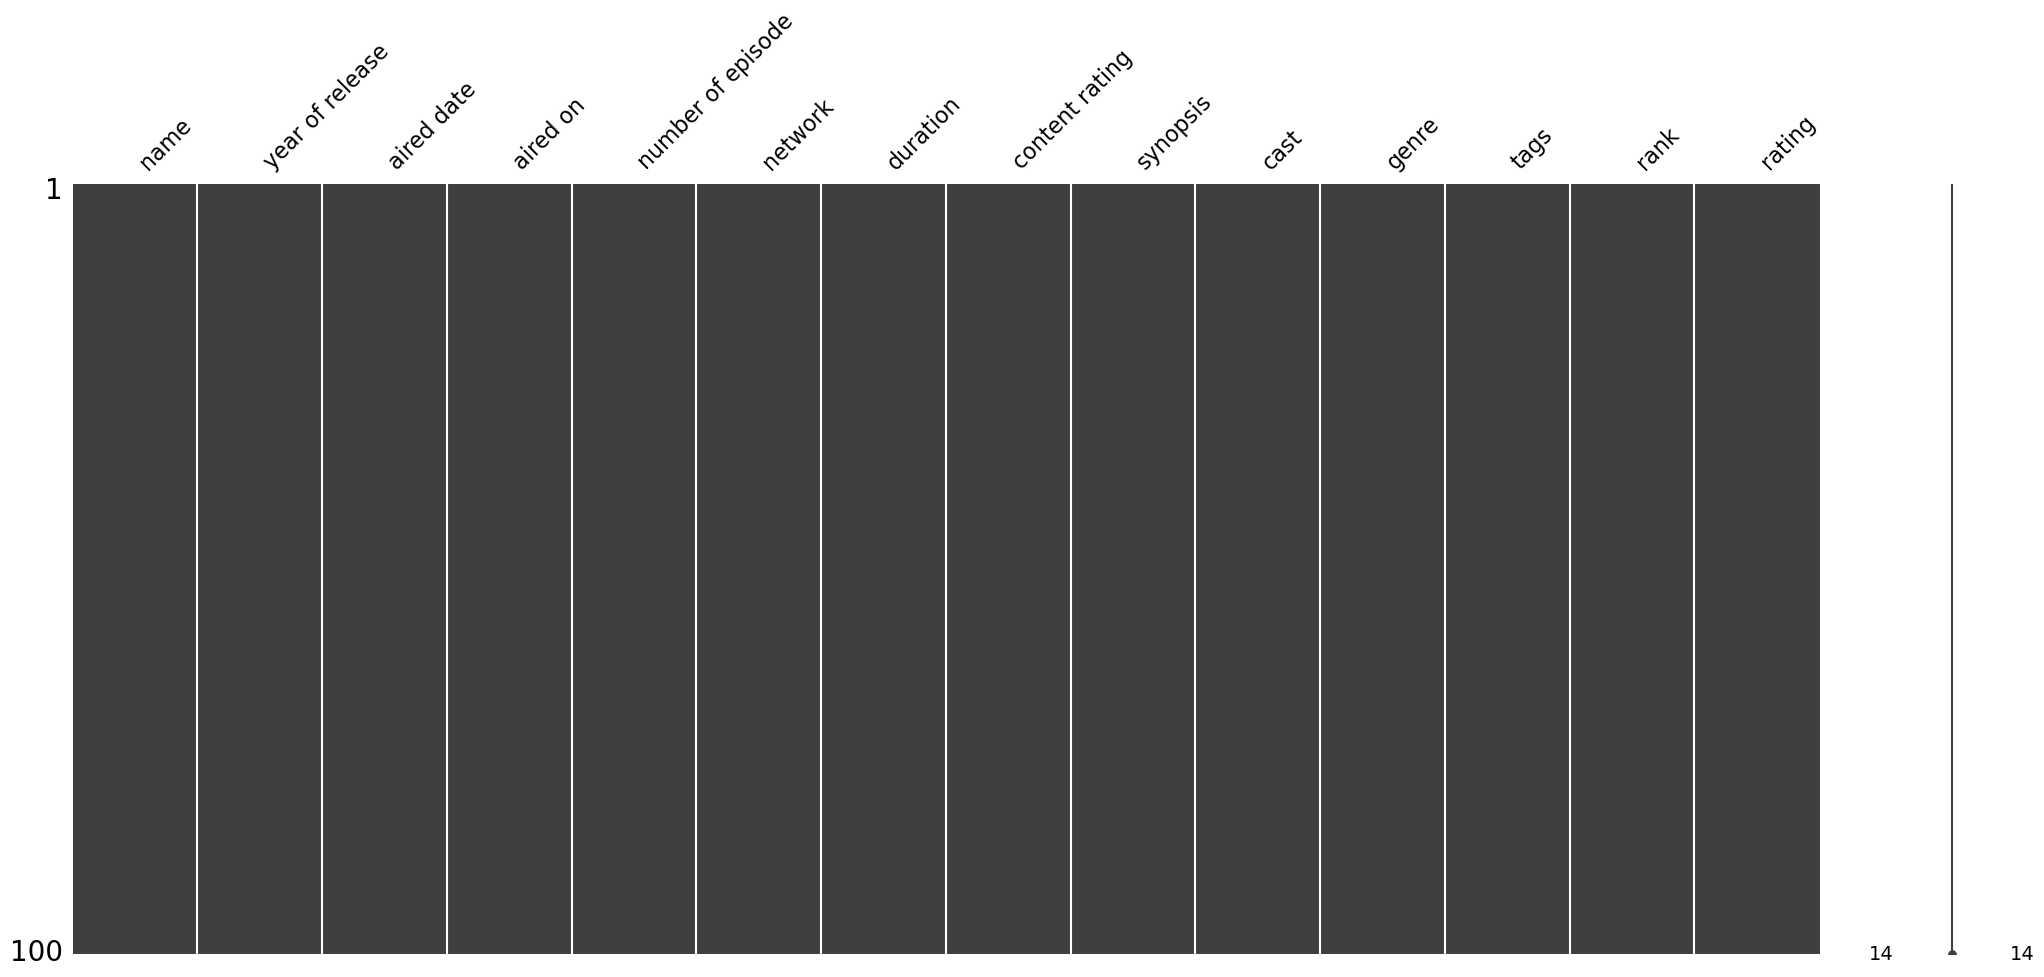

In [234]:
checkNull(df, True)

In [235]:
def sep_cat_num_cols(df):
    # seperate categorical and numerical columns
    cat_cols= df.select_dtypes(include= 'object').columns
    num_cols= df.select_dtypes(exclude= 'object').columns
    
    return cat_cols, num_cols

In [236]:
cat_cols_names, num_cols_names= sep_cat_num_cols(df)
cat_cols_names, num_cols_names

(Index(['name', 'aired date', 'aired on', 'network', 'duration',
        'content rating', 'synopsis', 'cast', 'genre', 'tags', 'rank'],
       dtype='object'),
 Index(['year of release', 'number of episode', 'rating'], dtype='object'))

In [237]:
num_cols = num_cols_names

cat_cols = ['aired on', 'network', 'duration',
        'content rating']

In [238]:
# !pip install plotly_express

In [239]:
import plotly_express as px
# Univariate analysis

def univariate_Cat_Num_Cols(df, cat_plots= True, num_plots= True, show_pie= False):
    
    if cat_plots:
        print("\t"*2, "-" * 40, 'Univariate Categorical Analysis', '-'*40, '\n\n')
        # Univariate for categorical cols
        for cols in cat_cols:
            print("\n")
            plt.figure(figsize= (12, 5))
            sns.countplot(data= df, x=cols)

            len_cols= df[cols].nunique()
            # Increase the size of x-axis tick labels
            if len_cols == 5:
                plt.xticks(fontsize=12, rotation= 45)
            elif len_cols > 5:
                plt.xticks(fontsize=12, rotation= 80)
            else:
                plt.xticks(fontsize=12)
            plt.xlabel(cols, fontsize=15)  # Adjust the font size as needed
            # Show the plot
            plt.show()

            # Example data
            labels = df[cols].value_counts().keys()
            sizes = df[cols].value_counts().values  # Relative sizes or proportions

            if show_pie == True:
                # Create a pie chart
                plt.figure(figsize=(8, 6))
                pie= px.pie(names=labels, values=sizes, title='Pie Chart Example', )
                pie.show()

    if num_plots:
        print("\n","=#=" * 50)
        print("\n\t"*2, "-" * 40, 'Univariate Numerical Analysis', '-'*40, '\n\n')
        df.hist(figsize= (10, 13));
        plt.show()
        
        for col in num_cols:
            plt.boxplot(df[col])
            plt.xlabel(col)
            plt.show()
    

		 ---------------------------------------- Univariate Categorical Analysis ---------------------------------------- 






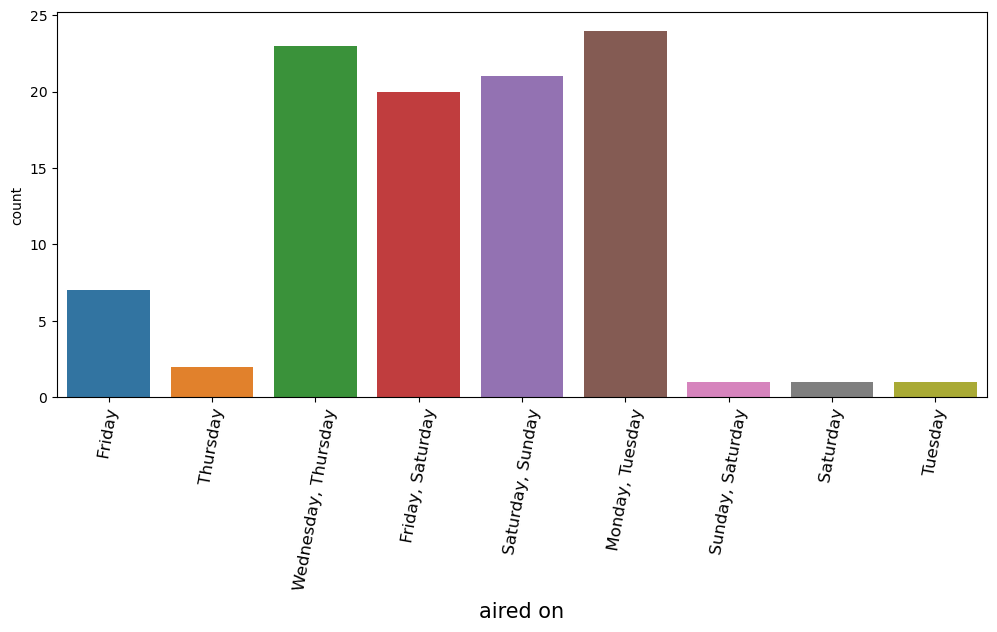

<Figure size 800x600 with 0 Axes>

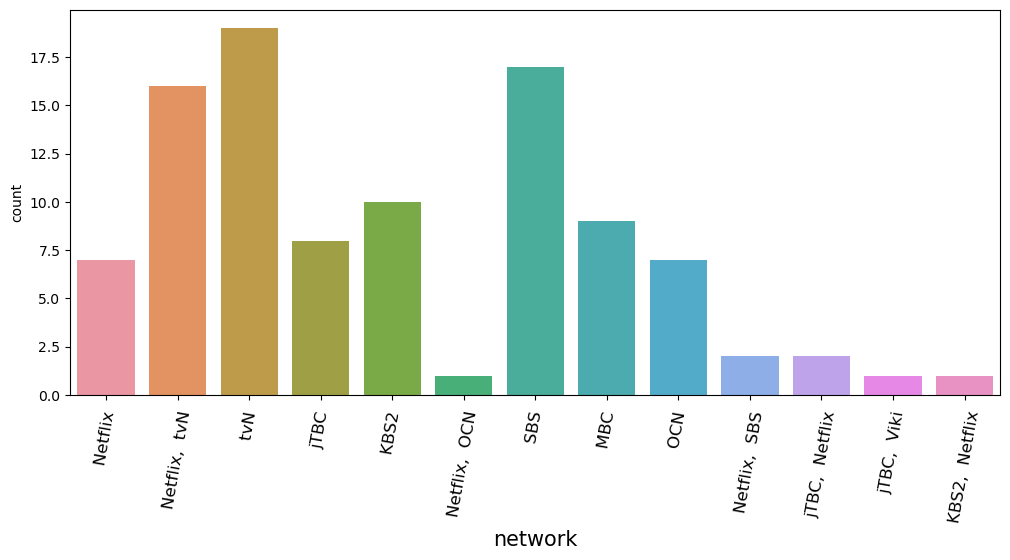

<Figure size 800x600 with 0 Axes>

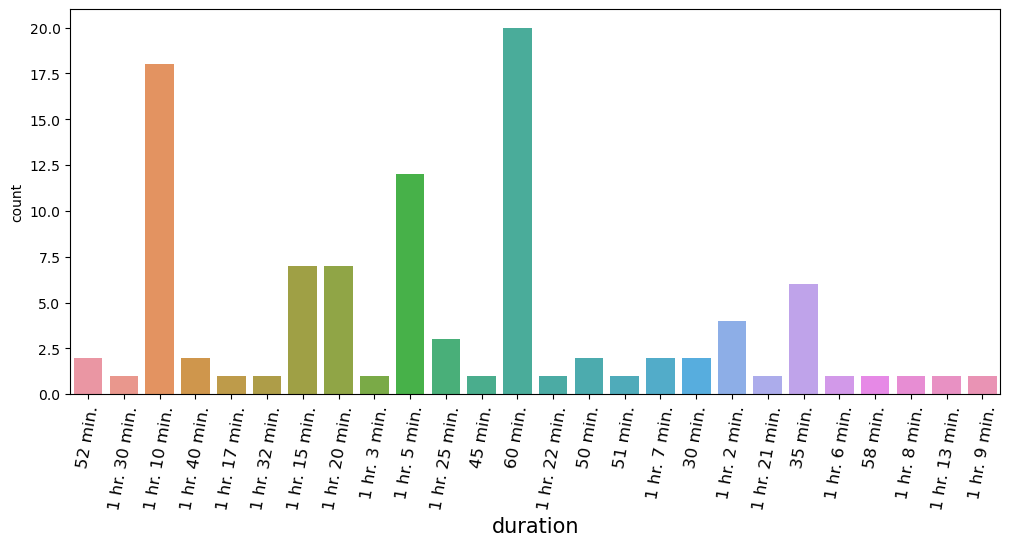

<Figure size 800x600 with 0 Axes>

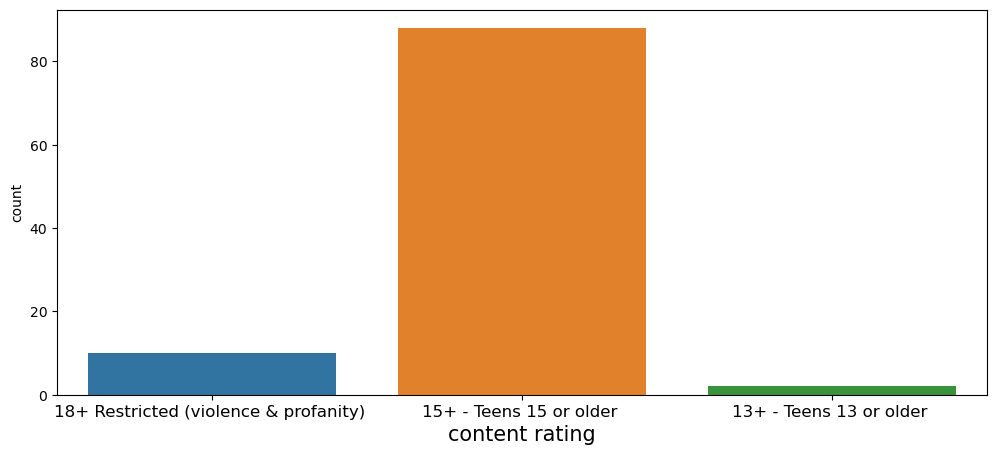


 =#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#==#=

	
	 ---------------------------------------- Univariate Numerical Analysis ---------------------------------------- 




<Figure size 800x600 with 0 Axes>

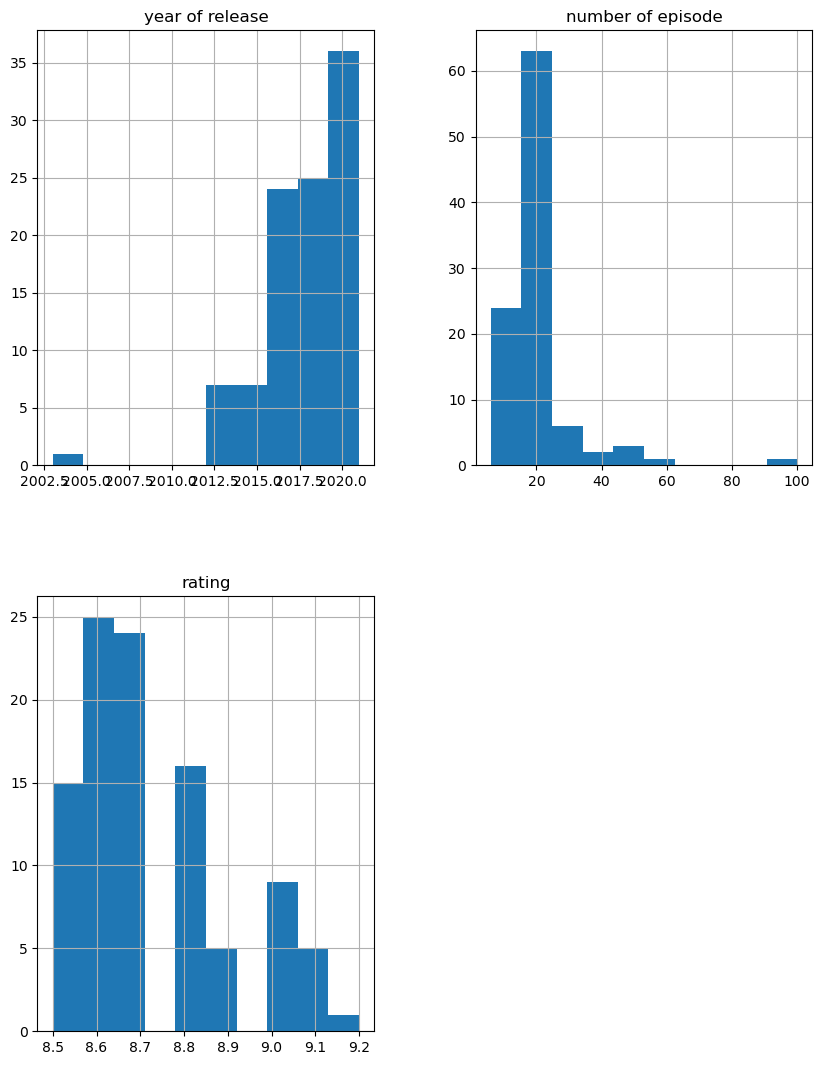

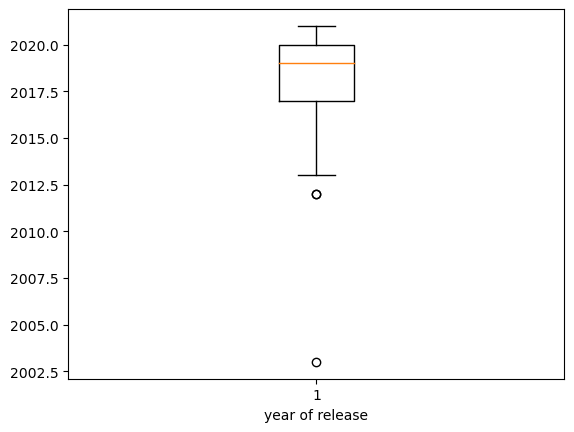

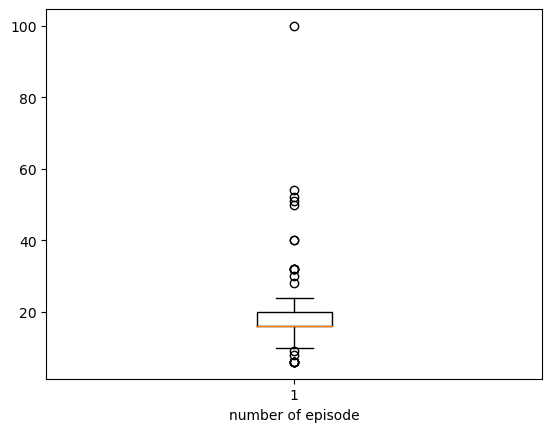

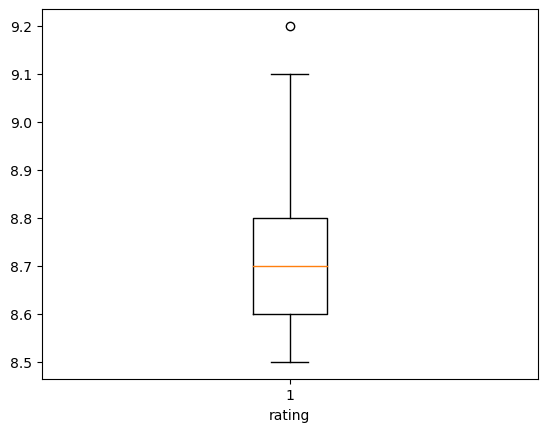

In [240]:
univariate_Cat_Num_Cols(df, True, True, True)

#### **Bivariate Plotting**

In [241]:
def bivariate_Cat_To_Cat_Plots(df, xcol, ycol= None, hue= None, facet_col= None, plot_type= 'bar', fig_size= (8, 5)):
    
    plt.figure(figsize= fig_size)
    
    if plot_type == 'count':

        fig= px.bar(df, x= xcol, y= ycol, color= hue, facet_col= facet_col,  barmode = 'group')
        
        return fig
            
    elif plot_type == 'crosstab':
        crosstab= pd.crosstab(df[xcol], df[ycol])
        
        return crosstab
    
    elif plot_type == 'chi':
        contingency_table= pd.crosstab(df[xcol], df[ycol])
        print("Cross Table: \n", contingency_table)
        
        # perform chi-square test (used to determine whether there is a significant association between two categorical variables. )
        chi2_stat, p_val, dof, expected= chi2_contingency(contingency_table)
        
        # Print the results
        print("\nChi-Square Test Statistic:", chi2_stat)
        print("\nP-value:", p_val)
        print("\nDegrees of Freedom:", dof)
        print("\nExpected Frequencies Table:\n")
        print(expected, '\n')
        

In [242]:
def bivariate_Num_To_Num_Plots(df, xcol= None, ycol= None, hue= None, facet_col= None,  plot_type= 'scatter', fig_size= (8, 5)):
    
    plt.figure(figsize= fig_size)
    if plot_type == 'scatter':
        fig= px.scatter(df, x= xcol, y= ycol, color= hue, facet_col= facet_col)

        return fig
    
    elif plot_type == 'corr':
        
        # Calculate and print the correlation matrix
        corr= df[num_cols].corr()
        print('\n\nCorrelation Matrix: \n', corr, '\n\n')
        
        # Plot the correlation heatmap
        fig= px.imshow(df[num_cols].corr(),
                        labels=dict(color="Correlation"),
                        x=num_cols,
                        y=num_cols,
                        color_continuous_scale='Viridis', text_auto= True)

        # Customize the layout
        fig.update_layout(title="Correlation Heatmap",
                          width=800,
                          height=900)
        
        return fig.show()


In [243]:
def bivariate_Cat_To_Num_Plots(df, xcol, ycol,hue= None, facet_col= None, plot_type= None):
    
    if plot_type == 'bar':

        fig= px.bar(df, x= xcol, y= ycol, color= hue, facet_col= facet_col,  barmode = 'group')
        
        return fig
    
    elif plot_type == 'box':
        
        box= px.box(df, xcol, ycol, hue, facet_col)
        return box
    
    elif plot_type== 'violin':
        violin= px.violin(df, xcol, ycol, hue, facet_col)
        
        
    elif plot_type == 'pie':
        # Create a pie chart
        plt.pie(ycol, labels=xcol, autopct='%1.1f%%', startangle=140)
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.title('Pie Chart Example')
        plt.show()
        
    elif plot_type == 't-test':
        # Perform independent t-test
        t_statistic, p_value = ttest_ind(df[xcol], df[ycol])
        print(f'T-statistic: {t_statistic}, p-value: {p_value}')

        # Check the results
        if p_value != np.NAN and p_value < 0.05:
            print("There is a significant difference between the means (reject null hypothesis)")
        else:
            print("There is no significant difference between the means (fail to reject null hypothesis)")
        
    elif plot_type == 'z-test':
        # Perform z-test
        z_statistic, p_value = ztest(df[xcol], df[ycol])
        print(f'Z-statistic: {z_statistic}, p-value: {p_value}')


        # Check the results
        if p_value != np.NAN and p_value < 0.05:
            print("There is a significant difference between the means (reject null hypothesis)")
        else:
            print("There is no significant difference between the means (fail to reject null hypothesis)")

In [244]:
df.head(2)

,name,year of release,aired date,aired on,number of episode,network,duration,content rating,synopsis,cast,genre,tags,rank,rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1


In [245]:
bivariate_Cat_To_Num_Plots(df, 'network', 'rating', plot_type= 'bar')

In [246]:
bivariate_Cat_To_Num_Plots(df, 'content rating', 'rating', plot_type= 'bar')

In [247]:
bivariate_Cat_To_Num_Plots(df, 'genre', 'rating', plot_type= 'bar')

In [248]:
bivariate_Cat_To_Num_Plots(df, 'name', 'rating', plot_type= 'bar')

In [249]:
df.head()

,name,year of release,aired date,aired on,number of episode,network,duration,content rating,synopsis,cast,genre,tags,rank,rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1
2,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...",#3,9.1
3,Hospital Playlist 2,2021,"Jun 17, 2021 - Sep 16, 2021",Thursday,12,"Netflix, tvN",1 hr. 40 min.,15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",#4,9.1
4,My Mister,2018,"Mar 21, 2018 - May 17, 2018","Wednesday, Thursday",16,tvN,1 hr. 17 min.,15+ - Teens 15 or older,Park Dong Hoon is a middle-aged engineer who i...,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...","Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...",#5,9.1


#### Feature Engineering

In [250]:
df['rank'] = [i.replace('#','') for i in df['rank']]

#### Demographic/Popularity based Recommendatio

In [251]:
df[['name', 'rank', 'rating']].head(10)

,name,rank,rating
0,Move to Heaven,1,9.2
1,Hospital Playlist,2,9.1
2,Flower of Evil,3,9.1
3,Hospital Playlist 2,4,9.1
4,My Mister,5,9.1
5,Prison Playbook,6,9.1
6,Reply 1988,7,9.0
7,It's Okay to Not Be Okay,8,9.0
8,Mr. Queen,9,9.0
9,Mother,10,9.0


### Content Based Recommendation

In [252]:
df.columns

Index(['name', 'year of release', 'aired date', 'aired on',
       'number of episode', 'network', 'duration', 'content rating',
       'synopsis', 'cast', 'genre', 'tags', 'rank', 'rating'],
      dtype='object')

### Synopsis Based

In [253]:
df_cont = df[['name', 'synopsis']]
df_cont.head()

,name,synopsis
0,Move to Heaven,Geu Roo is a young autistic man. He works for ...
1,Hospital Playlist,The stories of people going through their days...
2,Flower of Evil,Although Baek Hee Sung is hiding a dark secret...
3,Hospital Playlist 2,Everyday is extraordinary for five doctors and...
4,My Mister,Park Dong Hoon is a middle-aged engineer who i...


In [254]:
def preprocessing(text):

    # convert into tokens
    tokens= nltk.word_tokenize(text)

    # convert test to lower case
    tokens = [token.lower() for token in tokens]
    
    # remove stopwords
    stop_words= set(stopwords.words('english'))
    tokens= [token for token in tokens if token not in stop_words]
    
    # remove single and double quotes
    tokens= [re.sub('’', '', token) for token in tokens]
    
    # remove double quotes
    tokens= [re.sub('“', '', token).replace('”', '') for token in tokens]

    # remove punctuations
    tokens= [re.sub('[%s]' % re.escape(string.punctuation),'',token) for token in tokens]
    
    # remove digits
    tokens= [re.sub('\d+', '', token) for token in tokens]

    # remove HTML tags
    tokens= [re.sub('\[.*?\]', '', token) for token in tokens]

    # remove urls
    tokens= [re.sub('https?://\S+|www\.\S+', '', token) for token in tokens]
    
    # remove extra space
    tokens= [re.sub('\s+', ' ', token) for token in tokens]

    # remove emojis 
    tokens= [re.sub(r"["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", "", token)  for token in tokens]  #removes emojis



    # Lemmatization is not working, so using steming
    lemma= nltk.WordNetLemmatizer()
    tokens = [lemma.lemmatize(token) for token in 
              tokens]
    
    # discard shortest words
    tokens = [token for token in tokens if len(token) > 2]
    
        
    return ' '.join(tokens)


In [255]:

df_cont['synopsis'] = df_cont['synopsis'].apply(preprocessing)

In [256]:
df_cont.head()

,name,synopsis
0,Move to Heaven,geu roo young autistic man work father busines...
1,Hospital Playlist,story people going day seemingly ordinary actu...
2,Flower of Evil,although baek hee sung hiding dark secret surr...
3,Hospital Playlist 2,everyday extraordinary five doctor patient ins...
4,My Mister,park dong hoon middleaged engineer married att...


In [257]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Tf-Idf Vectorization

tfidf = TfidfVectorizer()
tfidf_mat = tfidf.fit_transform(df['synopsis'])

tfidf_mat.shape

(100, 2058)

In [258]:
#  we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

from sklearn.metrics.pairwise import linear_kernel

cos_sim = linear_kernel(tfidf_mat, tfidf_mat)
cos_sim

array([[1.        , 0.05591749, 0.08838162, ..., 0.04665943, 0.05682578,
        0.        ],
       [0.05591749, 1.        , 0.04328669, ..., 0.08789657, 0.08876407,
        0.01864991],
       [0.08838162, 0.04328669, 1.        , ..., 0.10776406, 0.02800603,
        0.        ],
       ...,
       [0.04665943, 0.08789657, 0.10776406, ..., 1.        , 0.05261755,
        0.03251011],
       [0.05682578, 0.08876407, 0.02800603, ..., 0.05261755, 1.        ,
        0.01148196],
       [0.        , 0.01864991, 0.        , ..., 0.03251011, 0.01148196,
        1.        ]])

In [259]:
def get_recom(movie_name):
    
    idx = movie_idx[movie_name]
    
    # create a pairwise similarity score of all the movies
    sim_score = list(enumerate(cos_sim[idx]))
    
    # sort on the basis of second element
    sim_score = sorted(sim_score, key= (lambda x: x[1]), reverse = True)
    
    # get top 10 movies
    top_10 = sim_score[1:11]
    
    # get the movie indices
    movie_indices = [i[0] for i in top_10]
    
    return df_cont['name'].iloc[movie_indices]

In [528]:
get_recom('Vincenzo')

65         My Father is Strange
45    Arthdal Chronicles Part 2
68                 Good Manager
53       Descendants of the Sun
38                     18 Again
82                      Save Me
74                   Cruel City
56                   Law School
79         Avengers Social Club
27              The Devil Judge
Name: name, dtype: object

In [261]:
df.columns

Index(['name', 'year of release', 'aired date', 'aired on',
       'number of episode', 'network', 'duration', 'content rating',
       'synopsis', 'cast', 'genre', 'tags', 'rank', 'rating'],
      dtype='object')

###  Cast, Genre, tags and Synopsis based recommendation


In [324]:

df['clean_cast'] = [i.replace(' ', '').replace(',', ' ').lower() for i in df['cast']]
df['clean_genre'] = [i.replace(' ', '').lower().split(',')[:3] for i in df['genre']]
df['clean_tag'] = [i.replace(' ', '').replace(',', ' ').lower() for i in df['tags']]
df['clean_synopsis'] = df_cont['synopsis']

In [370]:
def create_soup(x):
    return x['clean_cast']+' '+' '.join(x['clean_genre'])+' '+ x['clean_tag']

df['soup'] = df.apply(create_soup, axis = 1)

In [323]:
# len(df_cont['synopsis'])

100

In [348]:
# create a df for 2nd scenario of content based recommendation
df_cont_2 = df[['name', 'soup']]

In [349]:
df_cont_2.head()

,name,soup
0,Move to Heaven,leejehoon tangjunsang hongseunghee jungsukyong...
1,Hospital Playlist,jojungsuk yooyeonseok jungkyungho kimdaemyung ...
2,Flower of Evil,leejoongi moonchaewon jangheejin seohyunwoo na...
3,Hospital Playlist 2,jojungsuk yooyeonseok jungkyungho kimdaemyung ...
4,My Mister,leesunkyun iu parkhosan songsaebyuk leejiah ki...


In [371]:
# lets create tfidf matrix
tfidf = TfidfVectorizer()
tfidf_mat = tfidf.fit_transform(df['soup'])

In [329]:
tfidf_mat

<100x2503 sparse matrix of type '<class 'numpy.float64'>'
	with 5360 stored elements in Compressed Sparse Row format>

In [372]:
# cosine similarites
cos_sim = cosine_similarity(tfidf_mat, tfidf_mat)

In [352]:
cos_sim

array([[1.        , 0.02354137, 0.02366611, ..., 0.0216958 , 0.03954021,
        0.03023522],
       [0.02354137, 1.        , 0.01927276, ..., 0.01640173, 0.05864551,
        0.02816652],
       [0.02366611, 0.01927276, 1.        , ..., 0.0788785 , 0.0150402 ,
        0.00472794],
       ...,
       [0.0216958 , 0.01640173, 0.0788785 , ..., 1.        , 0.01285271,
        0.02124307],
       [0.03954021, 0.05864551, 0.0150402 , ..., 0.01285271, 1.        ,
        0.0155318 ],
       [0.03023522, 0.02816652, 0.00472794, ..., 0.02124307, 0.0155318 ,
        1.        ]])

In [373]:
# create movie index
movie_idx = pd.Series(df_cont_2.index, df_cont_2['name'])
movie_idx

name
Move to Heaven                    0
Hospital Playlist                 1
Flower of Evil                    2
Hospital Playlist 2               3
My Mister                         4
                                 ..
Vagabond                         95
Doctor John                      96
When the Camellia Blooms         97
Because This Is My First Life    98
Fight For My Way                 99
Length: 100, dtype: int64

In [374]:
def recom(movie_name):
    
    idx = movie_idx[movie_name]
    
    # pairwise cos_score
    cos_score = list(enumerate(cos_sim[idx]))
    
    # sort the cos_score
    cos_score = sorted(cos_score, key= (lambda x: x[1]), reverse= True)
        
    # top 10 movies 
    top_10 = cos_score[1:11]
    
    # get movies id
    movie_id = [i[0] for i in top_10]
    
    return df['name'].iloc(movie_id)
    

In [375]:
get_recom('Vincenzo')

65         My Father is Strange
45    Arthdal Chronicles Part 2
68                 Good Manager
53       Descendants of the Sun
38                     18 Again
82                      Save Me
74                   Cruel City
56                   Law School
79         Avengers Social Club
27              The Devil Judge
Name: name, dtype: object

In [377]:
df['cast'][53]

'Song Joong Ki, Song Hye Kyo, Jin Goo, Kim Ji Won, Lee Seung Jun, Seo Jung Yeon'

In [378]:
df['cast'][13]

'Song Joong Ki, Jeon Yeo Been, Ok Taec Yeon, Kim Yeo Jin, Jo Han Chul, Kwak Dong Yeon'

### Collaborative Filtering Based on Users

In [467]:
# as userId is not present in the dataset we have so , we will create a random set of array of userId
df['userId']= np.random.randint(1,31, df.shape[0])
df.head(2)

,name,year of release,aired date,aired on,number of episode,network,duration,content rating,synopsis,cast,genre,tags,rank,rating,clean_cast,clean_genre,clean_tag,soup,clean_synopsis,userId
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",1,9.2,leejehoon tangjunsang hongseunghee jungsukyong...,"[life, drama, family]",autism uncle-nephewrelationship death savantsy...,leejehoon tangjunsang hongseunghee jungsukyong...,geu roo young autistic man work father busines...,4
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",2,9.1,jojungsuk yooyeonseok jungkyungho kimdaemyung ...,"[friendship, romance, life]",strongfriendship multiplemains bestfriends hos...,jojungsuk yooyeonseok jungkyungho kimdaemyung ...,story people going day seemingly ordinary actu...,28


In [468]:
# create a df

df_user = df[['name', 'rating', 'userId']]
df_user.reset_index(inplace= True)

In [527]:
df_user.head(5)

,index,name,rating,userId
0,0,Move to Heaven,9.2,4
1,1,Hospital Playlist,9.1,28
2,2,Flower of Evil,9.1,13
3,3,Hospital Playlist 2,9.1,3
4,4,My Mister,9.1,20


In [427]:
# ! pip install scikit-surprise

In [492]:
import surprise
from sklearn.metrics.pairwise import cosine_similarity
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate
from sklearn.model_selection import train_test_split

def get_recom_based_on_users(df_colab, userId):
    # Define a reader specifying the rating scale
    reader = Reader(rating_scale=(1, 10))

    # Load the dataset using the DataFrame
    data = Dataset.load_from_df(df_colab[['index','userId','rating']], reader)
    
     # Train the SVD algorithm on the full dataset
    trainset = data.build_full_trainset()
    algo = SVD()
    algo.fit(trainset)

    # Get the top-N recommendations for the user
    top_n_recommendations = {}

    # Get the list of all item ids
    all_item_ids = set(df_colab['index'].unique())

    # Items user has already rated
    user_rated_items = set(df_colab[df_colab['userId'] == userId]['index'])

    # Items user has not rated
    unrated_items = all_item_ids - user_rated_items

    # Predict ratings for unrated items
    predictions = [algo.predict(userId, item_id) for item_id in unrated_items]

    # Sort predictions by estimated rating in descending order
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Extract top-N recommendations
    top_n_recommendations[userId] = [pred.iid for pred in predictions[:10]]

    return top_n_recommendations


In [494]:
# for movie 'Vincenzo' userId is 59, so lets see what the model is recommending to Vincenzo watcher
# get_recom_based_on_users(df_user, 59)

# Example usage
user_id = 26
top_n_recommendations = get_recom_based_on_users(df_user, user_id)

print("Top 10 recommendations for user", user_id, ":", top_n_recommendations)
for idx in top_n_recommendations[user_id]:
    print( df_user[df_user['index'] == idx]['name'].values[0])


Top 10 recommendations for user 26 : {26: [27, 2, 20, 10, 9, 26, 30, 28, 23, 12]}
The Devil Judge
Flower of Evil
Goblin
Signal
Mother
Weightlifting Fairy Kim Bok Joo
Beyond Evil
Life on Mars
D.P.
Happiness


In [ ]:
# Vincenzo and The Devil Judge are of type Law,  Crime,  Drama  
# Vincenzo and Flower of Evil are having Drama genre in similar and have Smart Female Lead

In [518]:
df['genre'][2]

'Thriller,  Romance,  Crime,  Melodrama '

In [506]:
df['genre'][13]

'Comedy,  Law,  Crime,  Drama '

In [503]:
df_user[df_user['userId'] == 26]

,index,name,rating,userId
13,13,Vincenzo,9.0,26
19,19,Stranger,8.9,26
21,21,Hometown Cha-Cha-Cha,8.8,26
44,44,"Kill Me, Heal Me",8.7,26
72,72,Age of Youth,8.6,26
99,99,Fight For My Way,8.5,26


### Collaboration based on Item

In [523]:
# Item based Collaboration 

def get_recom_based_on_items(df_colab, user_id):

    # Define a reader specifying the rating scale
    reader = Reader(rating_scale= (1, 10))

    # Load the dataset using the defined reader
    data = Dataset.load_from_df(df_colab[['index','userId','rating']], reader)

    # Split the dataset into training and testing sets
    # trainset, _ = train_test_split(data, test_size=0.2, random_state=42)

    # Define the SVD algorithm
    svd = SVD(n_epochs = 50)

    # Cross-validate the model
    cross_validate(svd, data, measures=["rmse", "mae"], cv= 10)

    # train the model on entire dataset
    
    trainset = data.build_full_trainset()
    svd.fit(trainset)

    # Get the item factors matrix from the trained model
    item_factors = svd.qi

    # Compute item similarity using cosine similarity
    item_similarity = cosine_similarity(item_factors)

    # Gett the itemIds
    item_ids = np.array(list(trainset.ir.keys()))

    # Recommend top 10 items to the user 
    user_items = set(svd.trainset.ur[user_id])

    recommendations = []

    for item_id in item_ids:
        if item_id not in user_items:
            similarity_scores = item_similarity[item_id]
            top_similarity_indices = np.argsort(similarity_scores)[::-1][:10]
            avg_similarity = np.mean(similarity_scores[top_similarity_indices])
            recommendations.append((item_id, avg_similarity))

    # Sort the recommendations by average similarity and get top 10
    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)[:10]

    print("\nTop 10 Recommendations:\n\n")
    for item_id, similarity in recommendations:
        print(df_user['name'][item_id])
        
# We get a mean Root Mean Sqaure Error of 1.2042 approx which is more than good enough for our case. Let us now train on our dataset and arrive at predictions.

In [526]:
# create a df for item base filtering
df_item = df_user.copy()

# call the item based recommender system
get_recom_based_on_items(df_user, 26)


Top 10 Recommendations:


Move to Heaven
Kingdom
D.P.
The Devil Judge
Hospital Playlist
Flower of Evil
Goblin
My Mister
Mr. Queen
Happiness


In [ ]:
# As we can notice that for movie Vincenzo all the type of recomender has recommended The Devil Judge movie 

In [529]:
df_cont_2

,name,soup
0,Move to Heaven,leejehoon tangjunsang hongseunghee jungsukyong...
1,Hospital Playlist,jojungsuk yooyeonseok jungkyungho kimdaemyung ...
2,Flower of Evil,leejoongi moonchaewon jangheejin seohyunwoo na...
3,Hospital Playlist 2,jojungsuk yooyeonseok jungkyungho kimdaemyung ...
4,My Mister,leesunkyun iu parkhosan songsaebyuk leejiah ki...
...,...,...
95,Vagabond,leeseunggi baesuzy shinsungrok baekyoonshik mo...
96,Doctor John,jisung leeseyoung leekyuhyung hwanghee jungmin...
97,When the Camellia Blooms,gonghyojin kanghaneul kimjisuk sondambi ohjung...
98,Because This Is My First Life,jungsomin leeminki esom parkbyungeun kimgaeun ...


### Hybrid / SVD type of Recommender

In [535]:
def create_soup(x):
    return x['clean_cast']+' '+' '.join(x['clean_genre'])+' '+ x['clean_tag']+ ' '+ x['clean_synopsis']

# df['soup'] = df.apply(create_soup, axis = 1)

df['hyb_soup'] = df.apply(create_soup, axis = 1)

def content_based_filtering_recommendations(item_features, item_id, n=10):
    
    # Compute TF-IDF features for items
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(df[item_features])

    # Compute cosine similarity between items
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # Get indices of similar items
    similar_items_indices = cosine_sim[item_id].argsort()[-n-1:-1][::-1]

    return similar_items_indices

def hybrid_recommendations(userId, item_features, item_id, n=10):
    # Get collaborative filtering recommendations
    recommendations_cf = get_recom_based_on_users(df_user, userId)

    # Get content-based filtering recommendations
    recommendations_cb = content_based_filtering_recommendations(item_features, item_id, n)

    # Combine recommendations (e.g., take the union)
    hybrid_recommendations = list(set(recommendations_cf) | set(recommendations_cb))

    return hybrid_recommendations

In [544]:
# Example usage
userId = 26
item_id = 13
item_features = 'hyb_soup'

hybrid_rec = hybrid_recommendations(userId, item_features, item_id)

print("\nHybrid recommendations::\n")
for i in  hybrid_rec[1:11]:
    print(df['name'][i])


Hybrid recommendations::

18 Again
Mr. Queen
Cruel City
Arthdal Chronicles Part 2
Crash Landing on You
Descendants of the Sun
I Hear Your Voice
Law School
Weightlifting Fairy Kim Bok Joo
Life on Mars
